In [ ]:
#from google.colab import drive
#drive.mount('C:/AI')

In [ ]:
import pandas as pd
import seaborn as sns # Будем визулизировать данные этой библиотекой
import pandas as pd # Библиотека для работы с датафреймом
import numpy as np # Библиотека для работы с массивами
import matplotlib.pyplot as plt # Будем визулизировать данные этой библиотекой
sns.set_style('darkgrid')

In [ ]:
from tensorflow.keras import utils # Функции-утилиты для работы с категориальными данными
from tensorflow.keras.models import Sequential, Model # Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate # Основные слои
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D # Основные слои
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop, Nadam # Оптимизаторы
from tensorflow.keras.initializers import lecun_normal # Инициализатор
import re # Регулярные выражения
from sklearn.metrics import mean_squared_error, mean_absolute_error # Метрики для расчета ошибок
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler # Масштабирование данных
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import mutual_info_regression

In [ ]:
from keras.models import load_model

In [ ]:
import re
from tabulate import tabulate
pd.set_option("display.max_columns", 100)

##Деление базы на trein/val/test по id_nkbi

In [ ]:
from pandas.io.parsers.readers import read_csv
db = read_csv('/content/gdrive/MyDrive/Стажировка Скоринг/Red/df_all_cod_16-08.csv')

In [ ]:
#test
def split(db, name):

  # Получаем уникальные значения из db
  db_unique_len = db['id_nbki'].nunique()
  db_unique = db['id_nbki'].unique()

  # Выбираем 20% случайных значений из db_unique
  db_sample = np.random.choice(db_unique, size=int(0.2*len(db_unique)), replace=False)

  # Фильтруем db по значениям в db_sample
  db_test = db[db['id_nbki'].isin(db_sample)]
  # Фильтруем db по значениям, которых нет в db_sample
  db_train = db[~db['id_nbki'].isin(db_sample)]


  data = [
      ['DataFrame', 'Уникальных значений', 'Отобрали значений', 'Train', 'Test'],
      [name, db_unique_len, db_sample.shape[0], db_train.shape, db_test.shape]
  ]

  table = tabulate(data, tablefmt='grid')
  print(table, end='\n\n')

  return db_train, db_test


db_train, db_test = split(db, 'db')

+-----------+---------------------+-------------------+---------------+--------------+
| DataFrame | Уникальных значений | Отобрали значений | Train         | Test         |
+-----------+---------------------+-------------------+---------------+--------------+
| db        | 31076               | 6215              | (2806445, 43) | (687191, 43) |
+-----------+---------------------+-------------------+---------------+--------------+



In [ ]:
#val
def split1(db, name):

  # Получаем уникальные значения из db
  db_unique_len = db['id_nbki'].nunique()
  db_unique = db['id_nbki'].unique()

  # Выбираем 20% случайных значений из db_unique
  db_sample = np.random.choice(db_unique, size=int(0.2*len(db_unique)), replace=False)

  # Фильтруем db по значениям в db_sample
  db_val = db[db['id_nbki'].isin(db_sample)]
  # Фильтруем db по значениям, которых нет в db_sample
  db_train = db[~db['id_nbki'].isin(db_sample)]


  data = [
      ['DataFrame', 'Уникальных значений', 'Отобрали значений', 'Train', 'Val'],
      [name, db_unique_len, db_sample.shape[0], db_train.shape, db_val.shape]
  ]

  table = tabulate(data, tablefmt='grid')
  print(table, end='\n\n')

  return db_train, db_val


db_train, db_val = split1(db_train, 'db')

+-----------+---------------------+-------------------+---------------+--------------+
| DataFrame | Уникальных значений | Отобрали значений | Train         | Val          |
+-----------+---------------------+-------------------+---------------+--------------+
| db        | 24861               | 4972              | (2245406, 43) | (561039, 43) |
+-----------+---------------------+-------------------+---------------+--------------+



In [ ]:
db_train.to_csv('/content/gdrive/MyDrive/Стажировка Скоринг/Red/New/db_train_16-08_all.csv', index=False)

In [ ]:
db_val.to_csv('/content/gdrive/MyDrive/Стажировка Скоринг/Red/New/db_val_2021_16-08_all.csv', index=False)

In [ ]:
db_test.to_csv('/content/gdrive/MyDrive/Стажировка Скоринг/Red/New/db_test_2021_16-08_all.csv', index=False)

## перевод в numpy_array

Разбиваем данные на X и Y

In [ ]:
db = pd.read_csv('C:/AI/Scoring/Red/New/db_train_16-08_all.csv')

In [ ]:
db_val = pd.read_csv('C:/AI/Scoring/Red/New/db_val_2021_16-08_all.csv')

In [ ]:
db_test = pd.read_csv('C:/AI/Scoring/Red/New/db_test_2021_16-08_all.csv')

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2245406 entries, 0 to 2245405
Data columns (total 43 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   owner_id                             int64  
 1   contract_id                          int64  
 2   mark_kind                            int64  
 3   issue_dt                             int64  
 4   close_dt                             int64  
 5   region_name                          int64  
 6   city_name                            int64  
 7   population                           float64
 8   date_of_birth                        int64  
 9   gender                               int64  
 10  education                            int64  
 11  position                             int64  
 12  dt_nbki                              int64  
 13  id_nbki                              int64  
 14  issued                               int64  
 15  amount                          

In [ ]:
db_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561039 entries, 0 to 561038
Data columns (total 43 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   owner_id                             561039 non-null  int64  
 1   contract_id                          561039 non-null  int64  
 2   mark_kind                            561039 non-null  int64  
 3   issue_dt                             561039 non-null  int64  
 4   close_dt                             561039 non-null  int64  
 5   region_name                          561039 non-null  int64  
 6   city_name                            561039 non-null  int64  
 7   population                           561039 non-null  float64
 8   date_of_birth                        561039 non-null  int64  
 9   gender                               561039 non-null  int64  
 10  education                            561039 non-null  int64  
 11  position     

In [ ]:
db_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687191 entries, 0 to 687190
Data columns (total 43 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   owner_id                             687191 non-null  int64  
 1   contract_id                          687191 non-null  int64  
 2   mark_kind                            687191 non-null  int64  
 3   issue_dt                             687191 non-null  int64  
 4   close_dt                             687191 non-null  int64  
 5   region_name                          687191 non-null  int64  
 6   city_name                            687191 non-null  int64  
 7   population                           687191 non-null  float64
 8   date_of_birth                        687191 non-null  int64  
 9   gender                               687191 non-null  int64  
 10  education                            687191 non-null  int64  
 11  position     

In [ ]:
db.head(10)


,owner_id,contract_id,mark_kind,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,type_credit,status_credit,period,period_interest,psk,balance,current_indebtedness,expired,next_payment,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,amount_principal_debt_repaid,availability_support,Class
0,0,22969,1,1248,0,2,770,11103.0,14740,1,6,14,296,23502,10351,25000.0,12,0,15290,13892,200.75,0.0,29400.0,0.0,29400.0,6424,7589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1523,8,0.0,9654,9430,0.0,0,1
1,0,22969,1,1248,0,2,770,11103.0,14740,1,6,14,296,23502,8885,331710.0,19,12,15237,13839,19.00,474295.0,0.0,0.0,0.0,9670,7568,0.0,0.0,0.0,0.0,0.0,0.0,415008.0,0.0,1523,0,0.0,9633,9409,0.0,0,1
2,0,22969,1,1248,0,2,770,11103.0,14740,1,6,14,296,23502,10294,28840.0,12,12,15211,13813,255.50,31263.0,0.0,0.0,0.0,9644,7542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1523,8,0.0,9607,9383,0.0,0,1
3,0,22969,1,1248,0,2,770,11103.0,14740,1,6,14,296,23502,10279,15000.0,12,12,15192,13794,365.00,15960.0,0.0,0.0,0.0,9625,7526,0.0,0.0,0.0,0.0,0.0,0.0,50832.0,0.0,1523,8,0.0,9591,9357,0.0,0,1
4,0,22969,1,1248,0,2,770,11103.0,14740,1,6,14,296,23502,10285,15000.0,12,12,15222,13824,200.75,15165.0,0.0,0.0,0.0,9625,7523,15000.0,165.0,0.0,0.0,0.0,0.0,15165.0,0.0,1523,8,0.0,9588,9362,0.0,0,1
5,0,22969,1,1248,0,2,770,11103.0,14740,1,6,14,296,23502,10271,15210.0,12,12,15191,13793,255.50,16807.0,0.0,0.0,0.0,9624,7522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1523,8,0.0,9587,9363,0.0,0,1
6,0,22969,1,1248,0,2,770,11103.0,14740,1,6,14,296,23502,10231,28840.0,12,12,15153,13755,255.50,32272.0,0.0,0.0,0.0,9586,7493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1523,8,0.0,9549,9325,0.0,0,1
7,0,22969,1,1248,0,2,770,11103.0,14740,1,6,14,296,23502,10241,30000.0,12,12,15154,13756,365.00,31200.0,0.0,0.0,0.0,9587,7487,0.0,0.0,0.0,0.0,0.0,0.0,34872.0,0.0,1523,8,0.0,9552,9322,0.0,0,1
8,0,22969,1,1248,0,2,770,11103.0,14740,1,6,14,296,23502,10245,30000.0,12,12,15182,13784,200.75,30660.0,0.0,0.0,0.0,9587,7485,30000.0,660.0,0.0,0.0,0.0,0.0,30660.0,0.0,1523,8,0.0,9550,9322,0.0,0,1
9,0,22969,1,1248,0,2,770,11103.0,14740,1,6,14,296,23502,10224,10000.0,12,12,15164,13766,200.75,11155.0,0.0,0.0,0.0,9583,7482,10000.0,1155.0,0.0,0.0,0.0,0.0,11155.0,0.0,1523,8,0.0,9546,9322,0.0,0,1


In [ ]:
db = db.sample(frac=1)
db_val = db_val.sample(frac=1)
db_test = db_test.sample(frac=1)

In [ ]:
db.head(10)

,owner_id,contract_id,mark_kind,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,type_credit,status_credit,period,period_interest,psk,balance,current_indebtedness,expired,next_payment,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,amount_principal_debt_repaid,availability_support,Class
1256875,7557,30310,1,719,1655,52,735,12941.0,650,0,5,6,151,15408,5134,3150.0,12,12,4888,4884,365.000,3497.0,0.0,0.0,0.0,4829,4370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8,0.0,4815,4810,0.0,0,2
902294,342,6543,1,1752,273,24,45,61915.0,14602,0,6,6,525,16896,7439,50000.0,19,12,12643,11242,62.513,77459.0,0.0,0.0,0.0,7111,6590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1523,0,0.0,7049,7037,0.0,0,1
1682852,23893,17889,1,736,1059,56,505,291663.0,10675,0,6,18,561,25612,6362,7490.0,12,0,6121,6117,365.000,0.0,7490.0,0.0,0.0,1,4839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8,0.0,6032,6038,0.0,0,3
834655,339,16869,1,1562,111,13,300,85344.0,14566,0,6,6,130,5788,9022,6042.0,19,12,13949,12551,237.250,7141.0,0.0,0.0,0.0,8392,7367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1523,8,0.0,8350,8135,0.0,0,1
51601,28,22406,1,1889,227,23,356,64176.0,14660,0,5,6,213,10033,9533,11016.0,12,12,14465,13067,244.904,13307.0,0.0,0.0,0.0,8900,7368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1523,8,0.0,8859,8643,0.0,0,1
7268,8,1124,1,1637,64,7,302,27788.0,14659,0,5,6,59,29985,8693,7144.0,19,12,13622,12223,7201.000,7201.0,0.0,0.0,0.0,8042,6216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1523,8,0.0,7997,7793,0.0,0,1
707140,323,22730,1,1413,5,59,316,23114.0,14629,0,5,6,193,22930,9961,8720.0,12,12,14895,13497,365.000,10900.0,0.0,0.0,0.0,9324,7224,0.0,0.0,0.0,0.0,0.0,0.0,10900.0,0.0,1523,8,0.0,9287,9067,0.0,0,1
662604,307,837,1,1121,271,45,764,8193.0,14788,0,6,6,524,11621,10125,2150.0,12,12,15038,13640,328.500,2305.0,0.0,0.0,0.0,9471,7369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1523,8,0.0,9434,9202,0.0,0,1
1028709,367,12432,1,1170,294,23,689,29809.0,14691,0,6,5,59,8277,9518,8240.0,12,12,14433,13035,355.149,9473.0,0.0,0.0,0.0,8869,6788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1523,8,0.0,8828,8611,0.0,0,1
1006743,367,11971,1,1578,148,23,689,29809.0,14691,0,6,5,29,28247,9721,10300.0,12,12,14655,13257,365.000,13596.0,0.0,0.0,0.0,9090,6993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1523,8,0.0,9051,8833,0.0,0,1


In [ ]:
X = db.drop('Class', axis=1)
y = np.array(db['Class'])

In [ ]:
X_val = db_val.drop('Class', axis=1)
y_val = np.array(db_val['Class'])

In [ ]:
X_test = db_test.drop('Class', axis=1)
y_test = np.array(db_test['Class'])

In [ ]:
y = np.subtract(y, 1) #если классы идут с 1

In [ ]:
y_val = np.subtract(y_val, 1)

In [ ]:
y_test = np.subtract(y_test, 1)

In [ ]:
X, y

(         owner_id  contract_id  mark_kind  issue_dt  close_dt  region_name  \
 1256875      7557        30310          1       719      1655           52   
 902294        342         6543          1      1752       273           24   
 1682852     23893        17889          1       736      1059           56   
 834655        339        16869          1      1562       111           13   
 51601          28        22406          1      1889       227           23   
 ...           ...          ...        ...       ...       ...          ...   
 1585882      3058         2434          1       497      1605            9   
 1862963      2129         5668          0       880      2725            2   
 1877024      3165        14255          0       869      2280            2   
 1486569     15300        25786          1        18      1878           58   
 1106163      2313        24793          1       252      1291            5   
 
          city_name  population  date_of_birth  ge

In [ ]:
scaler = StandardScaler(with_mean=False) # Нормализуем данные
scaler.fit(X)
x = scaler.transform(X)
print(x) # Посмотрим на нормализованные данные
print(np.unique(y))

[[0.90527955 2.96581121 3.36548446 ... 1.62471197 0.         0.        ]
 [0.04096938 0.64022774 3.36548446 ... 2.37694347 0.         0.        ]
 [2.86222633 1.7504255  3.36548446 ... 2.0395033  0.         0.        ]
 ...
 [0.37914646 1.39484127 0.         ... 0.         0.12555216 0.        ]
 [1.8328407  2.52314114 3.36548446 ... 1.75340537 0.         0.        ]
 [0.27708239 2.42597682 3.36548446 ... 1.78853428 0.         0.        ]]
[0 1 2 3]


In [ ]:

scaler.fit(X_val)
x_val = scaler.transform(X_val)
print(x_val) # Посмотрим на нормализованные данные
print(np.unique(y_val))

[[0.01295793 2.16400937 3.56616696 ... 3.07688241 0.         0.        ]
 [0.03840684 0.62739206 3.56616696 ... 2.52745129 0.         0.        ]
 [0.02591586 2.95535199 3.56616696 ... 3.14637029 0.         0.        ]
 ...
 [0.33608904 2.62893056 3.56616696 ... 1.83291313 0.         0.        ]
 [2.53858707 1.3666493  3.56616696 ... 1.89933536 0.         0.        ]
 [2.75163413 0.17302605 3.56616696 ... 1.9517919  0.         0.        ]]
[0 1 2 3]


In [ ]:

scaler.fit(X_test)
x_test = scaler.transform(X_test)
print(x_test) # Посмотрим на нормализованные данные
print(np.unique(y_test))

[[0.20729105 1.58793633 3.44137262 ... 1.85136332 0.         0.        ]
 [0.03094971 2.97452417 3.44137262 ... 2.68524893 0.         0.        ]
 [1.28141377 1.33019458 3.44137262 ... 1.49035605 0.         0.        ]
 ...
 [1.71698889 0.17359319 3.44137262 ... 1.83935262 0.         0.        ]
 [2.38756584 0.73164134 3.44137262 ... 2.05794733 0.         0.        ]
 [0.02267246 1.09098905 3.44137262 ... 3.16087257 0.         0.        ]]
[0 1 2 3]


In [ ]:
from keras.utils import to_categorical

In [ ]:
print(np.unique(y))

[0 1 2 3]


In [ ]:
# Преобразование ответов в формат one_hot_encoding
y = to_categorical(y, num_classes = 4)

In [ ]:
y_val = to_categorical(y_val, num_classes = 4)

In [ ]:
y_test = to_categorical(y_test, num_classes = 4)

In [ ]:
print('Размер y_test:', y_test.shape)

Размер y_test: (687191, 4)


#Модель 2

In [ ]:
number_of_cols = x.shape[1]

model22_cl = Sequential() # Последовательная модель нейронной сети

model22_cl.add(Dense(512, input_dim=number_of_cols, kernel_initializer='lecun_normal', activation='selu'))
model22_cl.add(Dense(256, kernel_initializer='lecun_normal', activation='selu'))
model22_cl.add(BatchNormalization())
model22_cl.add(Dropout(0.2))
model22_cl.add(Dense(4, activation='softmax'))

model22_cl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               22016     
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 155396 (607.02 KB)
Trainable params: 154884 (605.02 KB)
Non-trainable params: 512 (2.00 KB)
________________

In [ ]:
model22_cl.compile(optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

In [ ]:
x.shape, y.shape

((2245406, 42), (2245406, 4))

Epoch 1/100
35085/35085 [==============================] - 104s 3ms/step - loss: 0.2155 - accuracy: 0.9027 - val_loss: 0.2150 - val_accuracy: 0.9051
Epoch 2/100
35085/35085 [==============================] - 96s 3ms/step - loss: 0.1830 - accuracy: 0.9152 - val_loss: 0.2530 - val_accuracy: 0.9021
Epoch 3/100
35085/35085 [==============================] - 95s 3ms/step - loss: 0.1688 - accuracy: 0.9225 - val_loss: 0.2652 - val_accuracy: 0.8979
Epoch 4/100
35085/35085 [==============================] - 95s 3ms/step - loss: 0.1559 - accuracy: 0.9295 - val_loss: 0.2477 - val_accuracy: 0.8997
Epoch 5/100
35085/35085 [==============================] - 97s 3ms/step - loss: 0.1440 - accuracy: 0.9358 - val_loss: 0.2526 - val_accuracy: 0.8989
Epoch 6/100
35085/35085 [==============================] - 95s 3ms/step - loss: 0.1328 - accuracy: 0.9416 - val_loss: 0.2727 - val_accuracy: 0.8939
Epoch 7/100
35085/35085 [==============================] - 95s 3ms/step - loss: 0.1232 - accuracy: 0.9466 - val

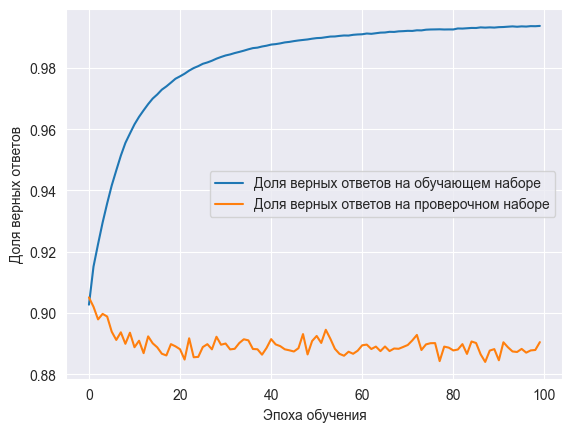

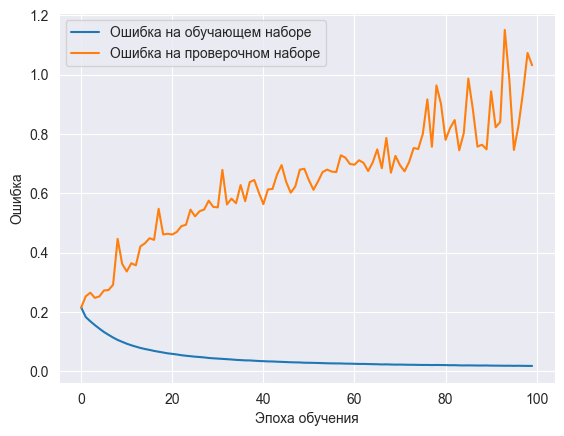

In [ ]:
import time
start_time = time.time() # счетчик времени
history = model22_cl.fit(x,                            # Обучающая выборка
                        y,                               # Метки классов обучающей выборки
                        epochs=100,                             # Количество эпох
                        batch_size=64,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x_val, y_val))   # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения

print('Максимальное значение accuracy:', max(history.history['accuracy'])) # print the highest accuracy achieved by the model

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
model22_cl.save('C:/AI/Scoring/Red/model2_all_3.keras')

In [ ]:
loss, acc = model22_cl.evaluate(x_test, y_test, verbose=1) #classification

21475/21475 [==============================] - 26s 1ms/step - loss: 0.8350 - accuracy: 0.8914


In [ ]:
loss

0.8349577188491821

In [ ]:
acc

0.8913984894752502

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

21475/21475 [==============================] - 27s 1ms/step
[[315535     43     26      0]
 [     9 151211  10734    378]
 [     2  16440  38439  29733]
 [     0    847  16418 107376]]


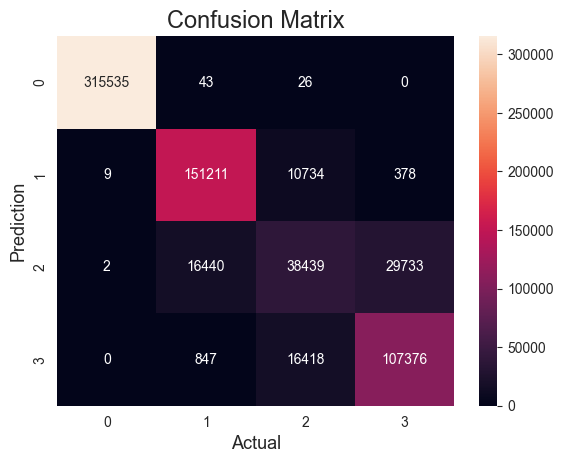

Accuracy   : 0.8913984612720481


In [ ]:
# compute the confusion matrix
y_pred=model22_cl.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)